In [9]:
import pandas as pd


db = pd.read_csv('datos.csv')
db.head()

db['Año'] = pd.to_datetime(db['Año'], format='%Y')
db['Año'] = db['Año'].dt.year

db = db[['ID', 'Año', 'Pais', 'TWh']]

#set the id NaN as the first three letters of Pais
db['ID'] = db['ID'].fillna(db['Pais'].str[:3].str.upper())

db



,ID,Año,Pais,TWh
0,AFG,2000,Afghanistan,0.0
1,AFG,2001,Afghanistan,0.0
2,AFG,2002,Afghanistan,0.0
3,AFG,2003,Afghanistan,0.0
4,AFG,2004,Afghanistan,0.0
...,...,...,...,...
9598,ZWE,2018,Zimbabwe,0.0
9599,ZWE,2019,Zimbabwe,0.0
9600,ZWE,2020,Zimbabwe,0.0
9601,ZWE,2021,Zimbabwe,0.0


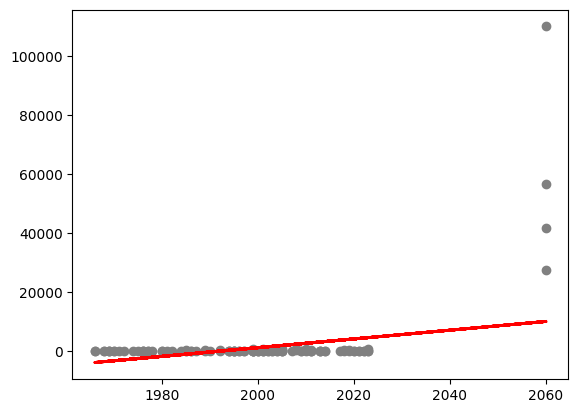

Mean Squared Error: 132458791.05102392
Next year prediction: [4553.47696712]
2022 prediction: [4553.47696712]
2023 prediction: [4701.20696141]
2024 prediction: [4848.9369557]
2025 prediction: [4996.66694999]
2026 prediction: [5144.39694428]
2027 prediction: [5292.12693857]
2028 prediction: [5439.85693286]
2029 prediction: [5587.58692715]
2030 prediction: [5735.31692144]
2031 prediction: [5883.04691574]
BRA Mean Squared Error: 63435.98138637801
BRA Next year prediction: [439.01044524]
BRA 2022 prediction: [439.01044524]
BRA 2023 prediction: [458.76637526]
BRA 2024 prediction: [478.52230527]
BRA 2025 prediction: [498.27823529]
BRA 2026 prediction: [518.0341653]
BRA 2027 prediction: [537.79009531]
BRA 2028 prediction: [557.54602533]
BRA 2029 prediction: [577.30195534]
BRA 2030 prediction: [597.05788535]
BRA 2031 prediction: [616.81381537]
CAN Mean Squared Error: 58645589.57087121
CAN Next year prediction: [116.45283228]
CAN 2022 prediction: [116.45283228]
CAN 2023 prediction: [118.2941451

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWa

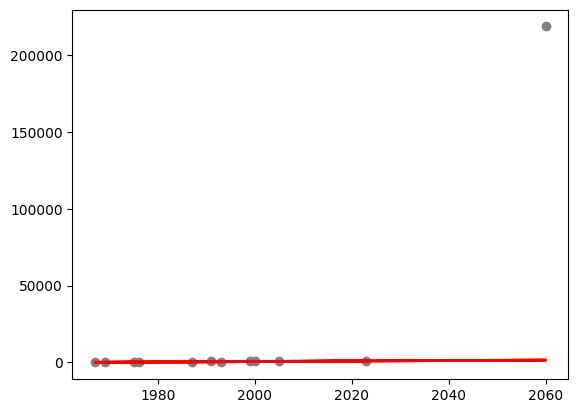

In [17]:
#implement linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
 
#add by country and year

db['TWh'] = pd.to_numeric(db['TWh'], errors='coerce')
db = db.groupby(['ID', 'Año']).sum().reset_index()
db = db[db['TWh'] > 0]
#filter by big countries
db = db[db['ID'].isin(['USA', 'CHN', 'RUS', 'IND', 'BRA', 'JPN', 'DEU', 'CAN', 'FRA', 'GBR'])]

#split the data

X = db[['Año']]

y = db['TWh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train the model

model = LinearRegression()

model.fit(X_train, y_train)

#predict

y_pred = model.predict(X_test)

#plot

plt.scatter(X_test, y_test, color='gray')

plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.show()

#evaluate

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

#predict the next year

print('Next year prediction:', model.predict([[2022]]))

#predict the next 10 years

for i in range(2022, 2032):

    print(f'{i} prediction:', model.predict([[i]]))

#predict the next 10 years for each country

for country in db['ID'].unique():

    db_country = db[db['ID'] == country]

    X = db_country[['Año']]

    y = db_country['TWh']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'{country} Mean Squared Error:', mean_squared_error(y_test, y_pred))

    print(f'{country} Next year prediction:', model.predict([[2022]]))

    for i in range(2022, 2032):

        print(f'{country} {i} prediction:', model.predict([[i]]))

#plot 

plt.scatter(X_test, y_test, color='gray')
    
plt.plot(X_test, y_pred, color='red', linewidth=2)
    
plt.show()







